<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

A university's bottom line metric is revenue, primarily dictated by tuition. This project aims to use SAT and ACT data to find the optimal target demographics so that universities can reevaluate the targeting in their marketing strategies, thus resulting in maximizing revenues.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

This project operates under a few assumptions for the analysis to be valid. The first (1) assumption that this project operates under is that the largest revenue stream for a for-profit private university is tuition ([source](https://nces.ed.gov/programs/coe/indicator/cud#:~:text=The%20primary2%20sources%20of,and%20appropriations%3B%20and%20auxiliary%20enterprises.)). We can approach tuition in one of two ways: we can either-

1. Maintain a higher-priced tuition with a smaller student body, or
2. Maintain a lower-priced tuition with a higher student body.

I am going to focus on the latter option: maintaining a lower-priced tuition with a higher student body, as down the line, the school has a wider pool of students to reach out to for donations post-graduation. To have a higher student body, a school would need a high number of applicants on an annual basis, and those applicants will likely need to be 'high-quality' applicants so that post-graduation, they will have more disposable income to allocate towards donations to their alma mater.

Assumption 2: High SAT scores and high ACT scores are an indicator of high-quality students that will likely have more disposable income to allocate towards donations to their alma mater post-graduation.

Assumption 3: SAT and ACT participation is an indicator of interest in applying to colleges. This assumption can help a school target the right demographics when developing a marketing strategy.

### Choose your Data

There are 10 datasets included in the [`data`](./data/) folder for this project. You are required to pick **at least two** of these to complete your analysis. Feel free to use more than two if you would like, or add other relevant datasets you find online.

* [`act_2017.csv`](./data/act_2017.csv): 2017 ACT Scores by State
* [`act_2018.csv`](./data/act_2018.csv): 2018 ACT Scores by State
* [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Scores by State
* [`act_2019_ca.csv`](./data/act_2019_ca.csv): 2019 ACT Scores in California by School
* [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Scores by State
* [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State
* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State
* [`sat_2019_by_intended_college_major.csv`](./data/sat_2019_by_intended_college_major.csv): 2019 SAT Scores by Intended College Major
* [`sat_2019_ca.csv`](./data/sat_2019_ca.csv): 2019 SAT Scores in California by School
* [`sat_act_by_college.csv`](./data/sat_act_by_college.csv): Ranges of Accepted ACT & SAT Student Scores by Colleges

#### Datasets I am using:

1. act_2019.csv: the most recent ACT scores and participation rates grouped by state.
2. sat_2019.csv: the most recent SAT scores and participation rates grouped by state.
3. sat_2019_by_intended_college_major.csv: contains the amount of students that took the SAT in 2019, their scores, and their intended majors.

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on state policies or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

In 2018 and 2019, the largest source of revenue for for-profit private educational institutions was tuition at 91%. ([source](https://nces.ed.gov/programs/coe/indicator/cud#:~:text=The%20primary2%20sources%20of,and%20appropriations%3B%20and%20auxiliary%20enterprises.))

There are 13 states that require that all students take the ACT, ([source](https://blog.prepscholar.com/which-states-require-the-act-full-list-and-advice)) and some states also required that students take the SAT in 2019. ([source](https://blog.collegevine.com/states-that-require-sat/))

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [19]:
# Code:
nums = list('1234567890')
nums = [int(x) for x in nums]

def average(num_list):
    return sum(num_list) / len(num_list)

average(nums)

4.5

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [20]:
# Code:

def calc_stddev(num_list):
    return (sum((x - average(num_list)) ** 2 for x in num_list) / len(num_list)) ** 0.5

calc_stddev(nums)

2.8722813232690143

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [21]:
# Code:

def pct_to_dec(pct_val):
    return int(pct_val.replace('%', '')) / 100

pct_to_dec('50%')

0.5

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [22]:
# Imports:

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import os

#### Managing Filepaths

In [23]:
data_path = os.path.join(os.getcwd(), 'data')

In [24]:
#os.chdir('..')

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [25]:
# Code:

act_2019 = pd.read_csv('./data/act_2019.csv')
sat_2019 = pd.read_csv('./data/sat_2019.csv')
sat_2019_by_major = pd.read_csv('./data/sat_2019_by_intended_college_major.csv')

sat_2019.head()

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


In [26]:
act_2019.head()

,State,Participation,Composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


In [27]:
sat_2019_by_major.head()

,IntendedCollegeMajor,TestTakers,Percent,Total,ReadingWriting,Math
0,"Agriculture, AgricultureOperations, and Relate...","24,913",1%,977,496,481
1,Architecture and Related Services,"28,988",2%,1047,520,527
2,"Area, Ethnic, Cultural, and Gender Studies","2,629",0%,1040,536,504
3,Biological and Biomedical Sciences,"155,834",8%,1139,572,566
4,"Business, Management, Marketing, and Related S...","221,523",12%,1072,534,537


In [28]:
sat_2019.isna().sum()

State                 0
Participation Rate    0
EBRW                  0
Math                  0
Total                 0
dtype: int64

In [29]:
act_2019.isna().sum()

State            0
Participation    0
Composite        0
dtype: int64

In [30]:
sat_2019_by_major.isna().sum()

IntendedCollegeMajor    0
TestTakers              0
Percent                 0
Total                   0
ReadingWriting          0
Math                    0
dtype: int64

In [31]:
sat_2019.describe()

,EBRW,Math,Total
count,53.000000,53.000000,53.000000
mean,558.000000,548.471698,1106.528302
std,47.554422,53.785044,100.994784
min,483.000000,445.000000,935.000000
25%,518.000000,506.000000,1024.000000
50%,550.000000,545.000000,1097.000000
75%,610.000000,596.000000,1200.000000
max,636.000000,648.000000,1284.000000


In [32]:
act_2019.describe()

,Composite
count,52.000000
mean,21.450000
std,2.175487
min,17.900000
25%,19.800000
50%,20.950000
75%,23.650000
max,25.500000


In [33]:
sat_2019_by_major.describe()

,Total,ReadingWriting,Math
count,38.000000,38.000000,38.000000
mean,1058.500000,535.500000,523.000000
std,82.445969,41.362439,43.386385
min,916.000000,458.000000,456.000000
25%,988.250000,501.250000,486.500000
50%,1066.500000,537.000000,527.000000
75%,1115.500000,569.750000,542.250000
max,1242.000000,597.000000,646.000000


In [34]:
def get_nonnumeric_vals(vals):
  non_numeric = set()
  for val in vals:
    try:
      pct_to_dec(val) # Made function for changing percents to decimals earlier in the notebook
    except ValueError:
      non_numeric.add(val)
  return non_numeric

get_nonnumeric_vals(sat_2019['Participation Rate']) # Taking out any NaNs that are not registered as NaNs

{'—'}

In [35]:
sat_2019[sat_2019['Participation Rate'] == list(get_nonnumeric_vals(sat_2019['Participation Rate']))[0]]

,State,Participation Rate,EBRW,Math,Total
39,Puerto Rico,—,483,462,944
47,Virgin Islands,—,490,445,935


In [36]:
sat_2019.tail(10)

,State,Participation Rate,EBRW,Math,Total
43,Tennessee,7%,618,602,1220
44,Texas,68%,515,507,1022
45,Utah,4%,614,615,1230
46,Vermont,66%,560,546,1106
47,Virgin Islands,—,490,445,935
48,Virginia,68%,567,551,1119
49,Washington,70%,539,535,1074
50,West Virginia,99%,483,460,943
51,Wisconsin,3%,635,648,1283
52,Wyoming,3%,623,615,1238


In [37]:
sat_2019 = sat_2019.drop(
    labels=[39, 47],
    axis=0
).reset_index()
sat_2019.tail(10)

,index,State,Participation Rate,EBRW,Math,Total
41,42,South Dakota,3%,633,635,1268
42,43,Tennessee,7%,618,602,1220
43,44,Texas,68%,515,507,1022
44,45,Utah,4%,614,615,1230
45,46,Vermont,66%,560,546,1106
46,48,Virginia,68%,567,551,1119
47,49,Washington,70%,539,535,1074
48,50,West Virginia,99%,483,460,943
49,51,Wisconsin,3%,635,648,1283
50,52,Wyoming,3%,623,615,1238


In [38]:
sat_2019 = sat_2019.drop(columns=['index'])
sat_2019.head()

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


In [39]:
sat_2019.dtypes

State                 object
Participation Rate    object
EBRW                   int64
Math                   int64
Total                  int64
dtype: object

In [40]:
sat_2019['Participation Rate'] = sat_2019['Participation Rate'].transform(pct_to_dec)
sat_2019.head()

,State,Participation Rate,EBRW,Math,Total
0,Alabama,0.07,583,560,1143
1,Alaska,0.41,556,541,1097
2,Arizona,0.31,569,565,1134
3,Arkansas,0.06,582,559,1141
4,California,0.63,534,531,1065


In [41]:
act_2019['Participation'] = act_2019['Participation'].transform(pct_to_dec)
act_2019.head()

,State,Participation,Composite
0,Alabama,1.00,18.9
1,Alaska,0.38,20.1
2,Arizona,0.73,19.0
3,Arkansas,1.00,19.3
4,California,0.23,22.6


In [42]:
sat_2019_by_major['Percent'] = sat_2019_by_major['Percent'].transform(pct_to_dec)
sat_2019_by_major.head()

,IntendedCollegeMajor,TestTakers,Percent,Total,ReadingWriting,Math
0,"Agriculture, AgricultureOperations, and Relate...","24,913",0.01,977,496,481
1,Architecture and Related Services,"28,988",0.02,1047,520,527
2,"Area, Ethnic, Cultural, and Gender Studies","2,629",0.00,1040,536,504
3,Biological and Biomedical Sciences,"155,834",0.08,1139,572,566
4,"Business, Management, Marketing, and Related S...","221,523",0.12,1072,534,537


In [43]:
sat_2019.dtypes

State                  object
Participation Rate    float64
EBRW                    int64
Math                    int64
Total                   int64
dtype: object

In [44]:
act_2019.dtypes

State             object
Participation    float64
Composite        float64
dtype: object

In [45]:
sat_2019_by_major.dtypes # would convert TestTakers to int but it will not be necessary in my analysis.

IntendedCollegeMajor     object
TestTakers               object
Percent                 float64
Total                     int64
ReadingWriting            int64
Math                      int64
dtype: object

In [46]:
sat_2019 = sat_2019.rename(columns={'State':'state', 'Participation Rate':'participation','EBRW':'reading_and_writing','Math':'math','Total':'scores'})
sat_2019.head()

,state,participation,reading_and_writing,math,scores
0,Alabama,0.07,583,560,1143
1,Alaska,0.41,556,541,1097
2,Arizona,0.31,569,565,1134
3,Arkansas,0.06,582,559,1141
4,California,0.63,534,531,1065


In [47]:
act_2019 = act_2019.rename(columns={'State':'state', 'Participation':'participation','Composite':'scores'})
act_2019.head()

,state,participation,scores
0,Alabama,1.00,18.9
1,Alaska,0.38,20.1
2,Arizona,0.73,19.0
3,Arkansas,1.00,19.3
4,California,0.23,22.6


In [48]:
sat_2019_by_major = sat_2019_by_major.rename(columns={'IntendedCollegeMajor':'intended_major', 'TestTakers':'participation','Percent':'pct_participation','Total':'scores','ReadingWriting':'reading_and_writing','Math':'math'})
sat_2019_by_major.head()

,intended_major,participation,pct_participation,scores,reading_and_writing,math
0,"Agriculture, AgricultureOperations, and Relate...","24,913",0.01,977,496,481
1,Architecture and Related Services,"28,988",0.02,1047,520,527
2,"Area, Ethnic, Cultural, and Gender Studies","2,629",0.00,1040,536,504
3,Biological and Biomedical Sciences,"155,834",0.08,1139,572,566
4,"Business, Management, Marketing, and Related S...","221,523",0.12,1072,534,537


In [49]:
sat_2019 = sat_2019.drop(columns=['reading_and_writing', 'math']) # For the purposes of this project, when identifying high-quality students, we will only need total scores, we will not need category-specific scores.
sat_2019.head()

,state,participation,scores
0,Alabama,0.07,1143
1,Alaska,0.41,1097
2,Arizona,0.31,1134
3,Arkansas,0.06,1141
4,California,0.63,1065


In [50]:
sat_2019_by_major = sat_2019_by_major.drop(columns=['reading_and_writing','math','participation'])
sat_2019_by_major.head()

,intended_major,pct_participation,scores
0,"Agriculture, AgricultureOperations, and Relate...",0.01,977
1,Architecture and Related Services,0.02,1047
2,"Area, Ethnic, Cultural, and Gender Studies",0.00,1040
3,Biological and Biomedical Sciences,0.08,1139
4,"Business, Management, Marketing, and Related S...",0.12,1072


In [51]:
# We need to remove any states in SAT and ACT data that have a 100% participation rate as these are states that have mandatory SAT and ACT participation for high school juniors, and that skews the data for our purposes.
sat_2019 = sat_2019[(sat_2019['participation'] < 1)]
sat_2019.head(10)

,state,participation,scores
0,Alabama,0.07,1143
1,Alaska,0.41,1097
2,Arizona,0.31,1134
3,Arkansas,0.06,1141
4,California,0.63,1065
8,District of Columbia,0.94,975
10,Georgia,0.71,1058
11,Hawaii,0.54,1100
14,Indiana,0.66,1080
15,Iowa,0.03,1244


In [52]:
act_2019 = act_2019[(act_2019['participation'] < 1)]
act_2019.head(10)

,state,participation,scores
1,Alaska,0.38,20.1
2,Arizona,0.73,19.0
4,California,0.23,22.6
5,Colorado,0.27,23.8
6,Connecticut,0.22,25.5
7,Delaware,0.13,24.1
8,District of Columbia,0.32,23.5
9,Florida,0.54,20.1
10,Georgia,0.49,21.4
11,Hawaii,0.80,19.0


In [53]:
sat_2019 = sat_2019.rename(columns={'participation':'participation_sat', 'scores': 'scores_sat'})

In [54]:
act_2019 = act_2019.rename(columns={'participation': 'participation_act', 'scores': 'scores_act'})

In [55]:
sat_act_df = sat_2019.merge(act_2019, how='inner', left_on='state', right_on='state') # Conducted an inner join because we already filtered out states with a SAT/ACT participation of 100%.
sat_act_df.head()

,state,participation_sat,scores_sat,participation_act,scores_act
0,Alaska,0.41,1097,0.38,20.1
1,Arizona,0.31,1134,0.73,19.0
2,California,0.63,1065,0.23,22.6
3,District of Columbia,0.94,975,0.32,23.5
4,Georgia,0.71,1058,0.49,21.4


In [56]:
# Code for the next 2 cells taken and adapted from: https://stackoverflow.com/questions/22872952/set-file-path-for-to-csv-in-pandas

sat_act_df.to_csv(os.path.join(data_path,r'sat_act_cleaned.csv'), index=False)

In [57]:
sat_2019_by_major.to_csv(os.path.join(data_path,r'sat_major_cleaned.csv'), index=False)

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

**To-Do:** *Edit the table below to create your own data dictionary for the datasets you chose.*

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*object*|SAT/ACT Data 2019|U.S. State|
|**participation_sat**|*float*|SAT/ACT Data 2019|Participation rate in the SAT, percentage as decimal (e.g. 10% == 0.10)|
|**scores_sat**|*int*|SAT/ACT Data 2019|Average score of the SAT by state (Out of 1600 points)|
|**participation_act**|*float*|SAT/ACT Data 2019|Participation rate in the ACT, percentage as decimal (e.g. 10% == 0.10)|
|**scores_act**|*int*|SAT/ACT Data 2019|Average score of the ACT by state (Out of 36 points)|


|Feature|Type|Dataset|Description|
|---|---|---|---|
|**intended_major**|*object*|SAT Scores by Intended Major Data 2019|Students' intended major|
|**pct_participation**|*float*|SAT Scores by Intended Major Data 2019|Participation rate in the SAT, percentage as decimal (e.g. 10% == 0.10)|
|**scores**|*int*|SAT Scores by Intended Major Data 2019|Average score of the SAT by intended major (Out of 1600 points)|

## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?
        - Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?
        - Do any states with 100% participation on a given test have a rate change year-to-year?
        - Do any states show have >50% participation on *both* tests each year?
        - Which colleges have the highest median SAT and ACT scores for admittance?
        - Which California school districts have the highest and lowest mean test scores?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [58]:
sat_act = pd.read_csv('./data/sat_act_cleaned.csv')
major = pd.read_csv('./data/sat_major_cleaned.csv')

In [59]:
sat_act.describe()

,participation_sat,scores_sat,participation_act,scores_act
count,28.000000,28.000000,28.000000,28.000000
mean,0.548571,1107.500000,0.456786,21.953571
std,0.329980,89.665841,0.270021,1.950020
min,0.020000,943.000000,0.060000,18.800000
25%,0.277500,1058.750000,0.227500,20.725000
50%,0.670000,1086.000000,0.385000,21.600000
75%,0.795000,1123.500000,0.722500,23.700000
max,0.990000,1284.000000,0.960000,25.500000


In [60]:
major.describe()

,pct_participation,scores
count,38.000000,38.000000
mean,0.025789,1058.500000
std,0.039975,82.445969
min,0.000000,916.000000
25%,0.000000,988.250000
50%,0.010000,1066.500000
75%,0.035000,1115.500000
max,0.180000,1242.000000


In [61]:
# The following code was adapted from this source: https://stackoverflow.com/questions/55048445/dictionary-comprehension-to-apply-a-function-to-dataframe-columns
# Writing reusable functions for readability, reusability, and for the purposes of the project guidelines

def sd(df):
    return {col.name : calc_stddev(col) for col in [df[i] for i in df.columns if (df[i].dtype == 'float64') or (df[i].dtype == 'int64')]}

sd(sat_act)

{'participation_sat': 0.324033885857133,
 'scores_sat': 88.05010748756317,
 'participation_act': 0.26515566279113123,
 'scores_act': 1.9148819700398438}

In [62]:
sd(major)

{'pct_participation': 0.03944560404747735, 'scores': 81.35392139482761}

In [63]:
# Finding students to market to by state based on high SAT and ACT participation and high scores- suggesting quality students

def sat_filter(df):
    filter = df[(df['participation_sat'] >= df['participation_sat'].quantile(.75)) & (df['scores_sat'] >= 1000)] 
    # Would prefer to use average scores as the threshold for this. Had to use 1000 as a score threshold because there is only 1 state with high participation that has above average scores.
    filter.sort_values('participation_sat', ascending=False)
    return filter[['state', 'participation_sat', 'scores_sat']]

sat_filter(sat_act)

,state,participation_sat,scores_sat
9,Maine,0.99,1013
10,Maryland,0.82,1058
11,Massachusetts,0.81,1120
14,New Hampshire,0.95,1059
15,New Jersey,0.82,1090


The above findings are the states that have high participation rates and high SAT scores, suggesting that these are states with a high percentage of high quality students that are interested in applying to colleges.

In [64]:
def act_filter(df):
    filter = df[(df['participation_act'] >= sat_act['participation_act'].quantile(.75)) & (sat_act['scores_act'] >= 20)]
    # Would have preferred to use above average scores for the threshold but that returned zero results- as we prioritize participation for this project, high scores are secondary.
    filter.sort_values('participation_act', ascending=False)
    return filter[['state', 'participation_act', 'scores_act']]

act_filter(sat_act)

,state,participation_act,scores_act
12,Minnesota,0.95,21.4
13,Missouri,0.82,20.8
22,South Dakota,0.75,21.6


The above findings are the states that have high participation rates and high ACT scores, suggesting that these are states with a high percentage of high quality students that are interested in applying to colleges.

In [65]:
def major_filter(df):
    filter = df[(df['pct_participation'] >= df['pct_participation'].quantile(.9)) & (df['scores'] >= average(df['scores']))]
    return filter.sort_values('pct_participation', ascending=False)

major_filter(major)

,intended_major,pct_participation,scores
4,"Business, Management, Marketing, and Related S...",0.12,1072
9,Engineering,0.11,1139
3,Biological and Biomedical Sciences,0.08,1139


The above findings are the majors that have the highest percentage participation (90th quantile), as well as having above average SAT scores. These are ideally the students that we want to attract to our school, as they not only have the highest scores and participate in the SAT the most, but there is also a high chance that these students will leave university and continue in their careers with high salaries, leaving more disposable income to donate to their alma mater in the future.

Health Professions and related Clinical sciences is not included in the above list because the average scores for intended clinical science majors is because their SAT scores are below the average. Incorporating intended health and clinical science majors into the target demographic may be dependent on the reputation on pre-med and related programs at the school that is being advertised.

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

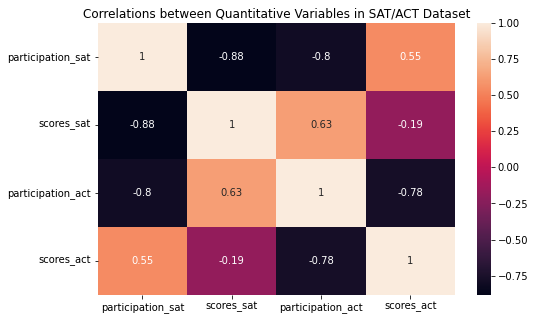

In [66]:
# Code

plt.figure(figsize=(8,5))
plt.title('Correlations between Quantitative Variables in SAT/ACT Dataset')
sns.heatmap(sat_act.corr(), annot=True);

*Interpretation*: High negative correlation between scores and participation rates, indicating if participation rates in a state are higher, then average scores are lower. If we separate U.S. states into two categories: high participation and low participation in the SAT and ACT- low participation states are states where there is likely to be low academic pressure to participate in these tests, and the only students that are participating are overachievers or students that specifically are trying to attend elite schools that require the SAT/ACT (pre-2021). High participation states likely have high academic pressure to participate in the tests, so we have a wider range of diverse students and a much larger population that could move the average score away from the lower participation states.

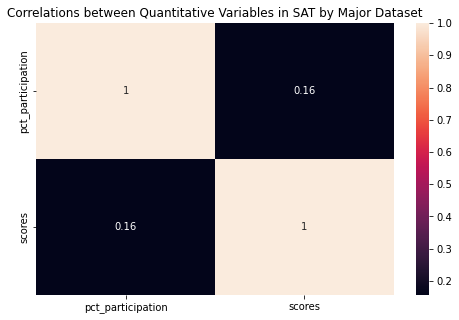

In [67]:
plt.figure(figsize=(8,5))
plt.title('Correlations between Quantitative Variables in SAT by Major Dataset')
sns.heatmap(major.corr(), annot=True);

*Interpretation*: Not much correlation between percentage participation and scores by intended major.

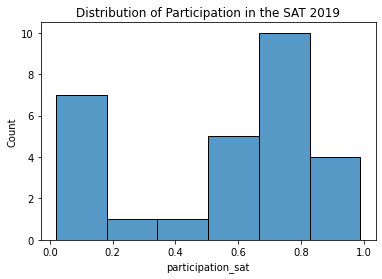

In [68]:
plt.title('Distribution of Participation in the SAT 2019')
sns.histplot(sat_act['participation_sat']);

*Interpretation*: The SAT 2019 dataset in regards to participation is bimodal and suggests that there are multiple separate populations within the data. However, the majority of the US population of high school students opt out of taking the SAT.

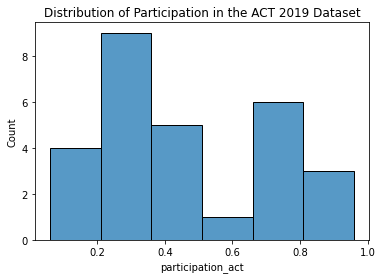

In [69]:
plt.title('Distribution of Participation in the ACT 2019 Dataset')
sns.histplot(sat_act['participation_act']);

*Interpretation*: Most students opt out of taking the SAT or ACT. However, there is a separate population of students who will still take it out of their own initiative. That population on the right side of the distribution is who we plan to target.

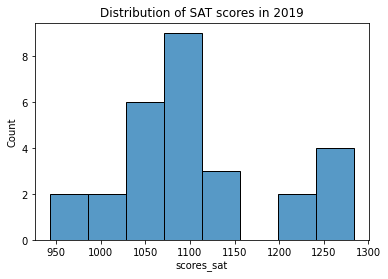

In [70]:
plt.title('Distribution of SAT scores in 2019')
sns.histplot(sat_act['scores_sat']);

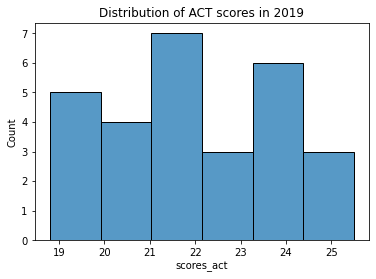

In [71]:
plt.title('Distribution of ACT scores in 2019')
sns.histplot(sat_act['scores_act']);

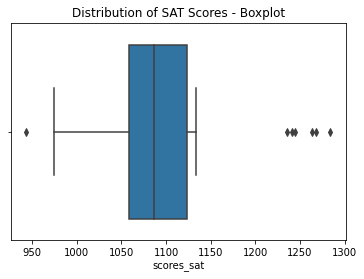

In [72]:
plt.title('Distribution of SAT Scores - Boxplot')
sns.boxplot(sat_act['scores_sat']);

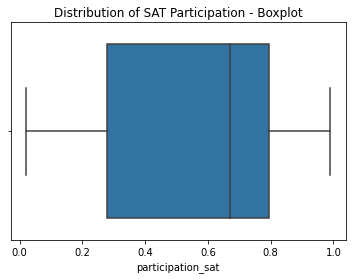

In [73]:
plt.title('Distribution of SAT Participation - Boxplot')
sns.boxplot(sat_act['participation_sat']);

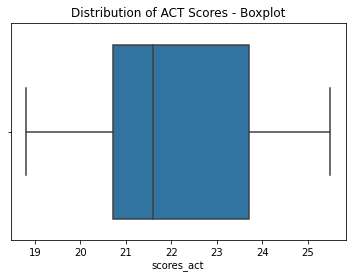

In [74]:
plt.title('Distribution of ACT Scores - Boxplot')
sns.boxplot(sat_act['scores_act']);

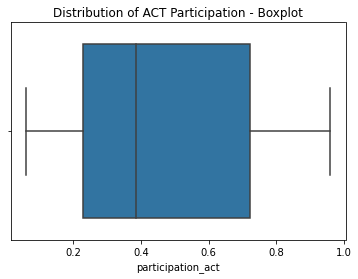

In [75]:
plt.title('Distribution of ACT Participation - Boxplot')
sns.boxplot(sat_act['participation_act']);

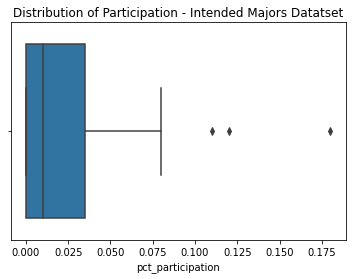

In [76]:
plt.title('Distribution of Participation - Intended Majors Datatset')
sns.boxplot(major['pct_participation']);

*Interpretation*: Based on the boxplots, voluntary SAT/ACT Participation for the general population is quite low. I am not removing the outliers in the 'major' dataset because those are the outlier majors that we want.

''

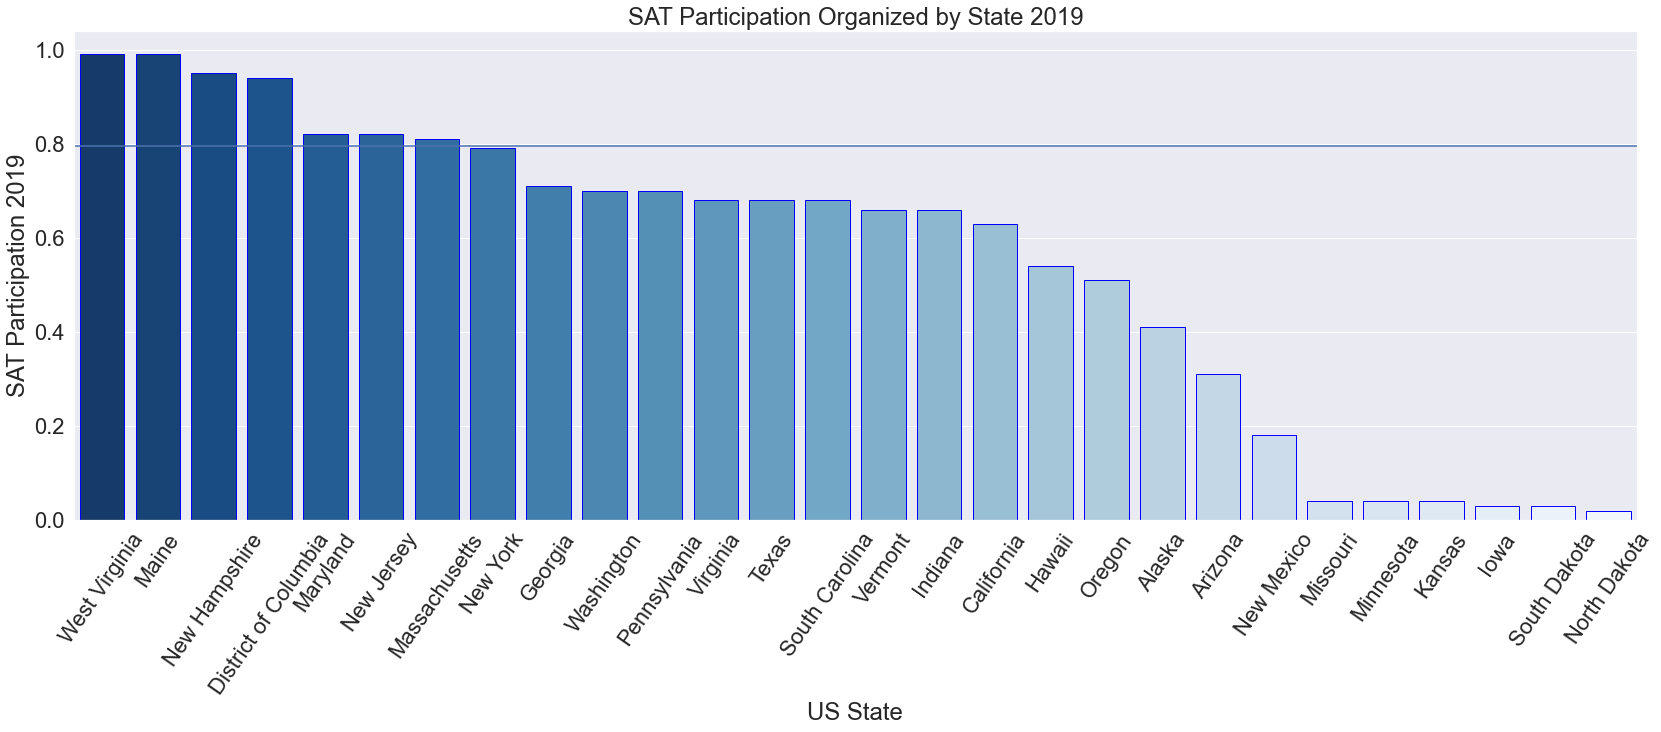

In [90]:
plt.figure(figsize=(28, 9))
plt.title('SAT Participation Organized by State 2019')
plt.xticks(rotation=55)

sns.set(font_scale=2)
ax = sns.barplot(data=sat_act, x='state', y='participation_sat', order=sat_act.sort_values('participation_sat', ascending=False)['state'], palette='Blues_r', edgecolor='blue')
ax.set(xlabel='US State', ylabel='SAT Participation 2019')
ax.axhline(sat_act['participation_sat'].quantile(0.75))
;

''

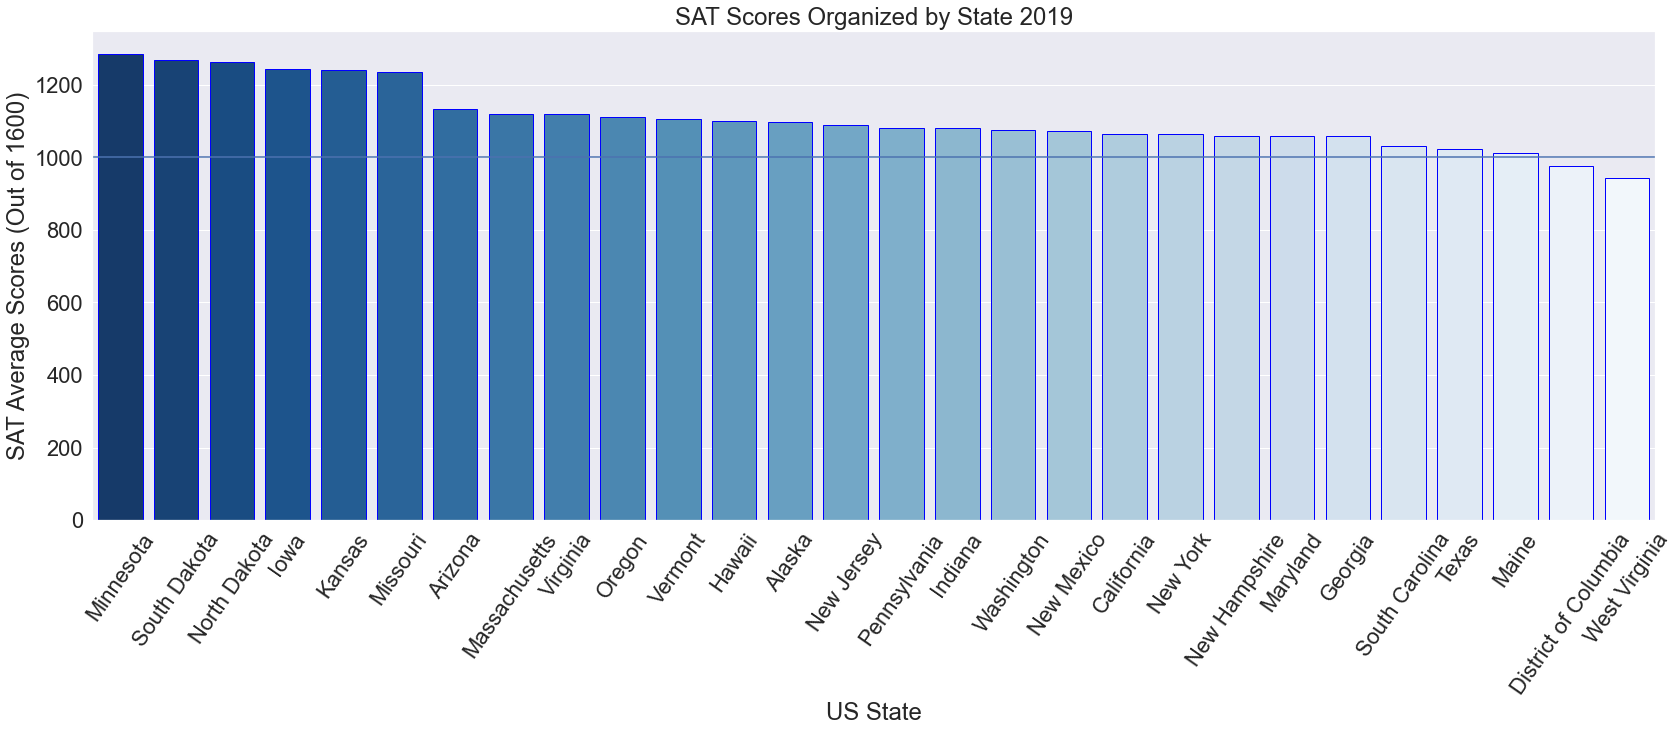

In [89]:
plt.figure(figsize=(28, 9))
plt.title('SAT Scores Organized by State 2019')
plt.xticks(rotation=55)

ax = sns.barplot(data=sat_act, x='state', y='scores_sat', order=sat_act.sort_values('scores_sat', ascending=False)['state'], palette='Blues_r', edgecolor='blue')
ax.set(xlabel='US State', ylabel='SAT Average Scores (Out of 1600)')
ax.axhline(1000)
;

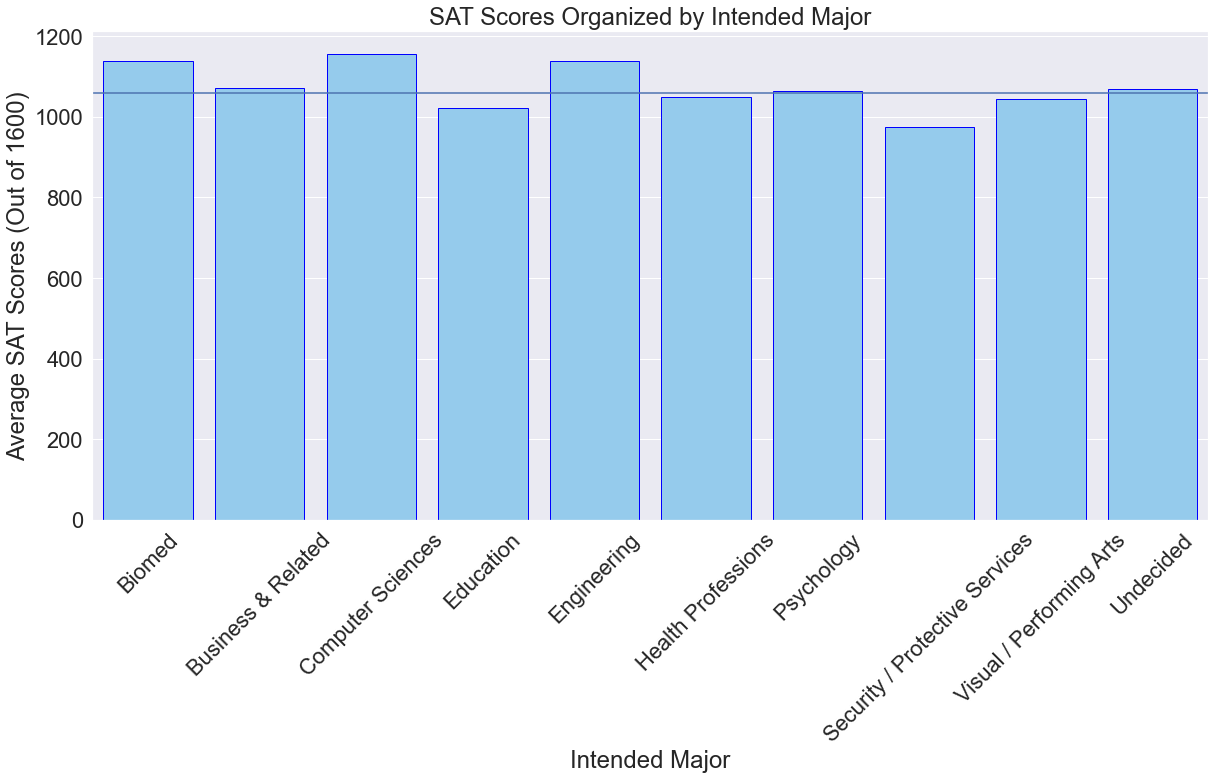

In [85]:
major_filter_1 = major[major['pct_participation'] >= major['pct_participation'].quantile(.75)]

plt.figure(figsize=(20, 9))
plt.title('SAT Scores Organized by Intended Major')
plt.xticks(rotation=45)

ax = sns.barplot(data=major_filter_1, x=['Biomed', 'Business & Related', 'Computer Sciences', 'Education','Engineering','Health Professions','Psychology','Security / Protective Services','Visual / Performing Arts','Undecided'], y='scores', color='lightskyblue', edgecolor='blue')
ax.set(xlabel='Intended Major', ylabel='Average SAT Scores (Out of 1600)')
ax.axhline(average(major['scores']));

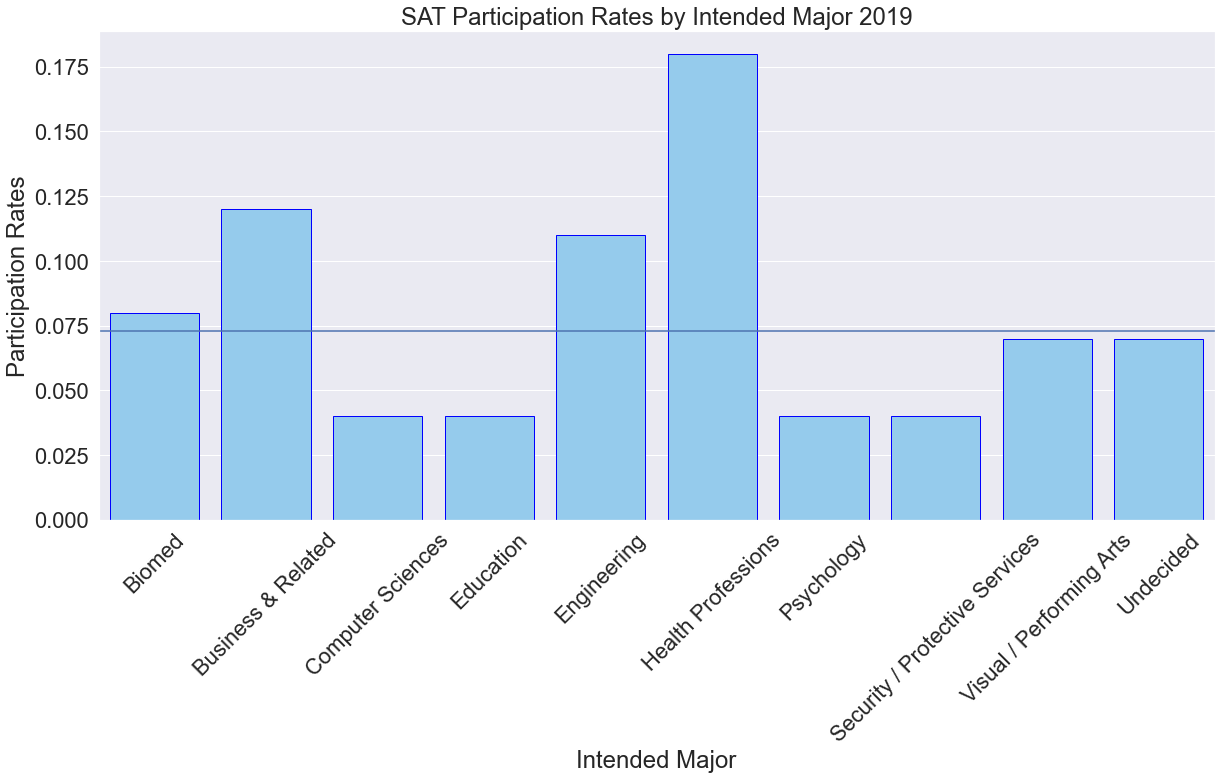

In [86]:
plt.figure(figsize=(20, 9))
plt.title('SAT Participation Rates by Intended Major 2019')
plt.xticks(rotation=45)

ax = sns.barplot(data=major_filter_1, x=['Biomed', 'Business & Related', 'Computer Sciences', 'Education','Engineering','Health Professions','Psychology','Security / Protective Services','Visual / Performing Arts','Undecided'], y='pct_participation', color='lightskyblue', edgecolor='blue')
ax.set(xlabel='Intended Major', ylabel='Participation Rates')
ax.axhline(major['pct_participation'].quantile(.90));

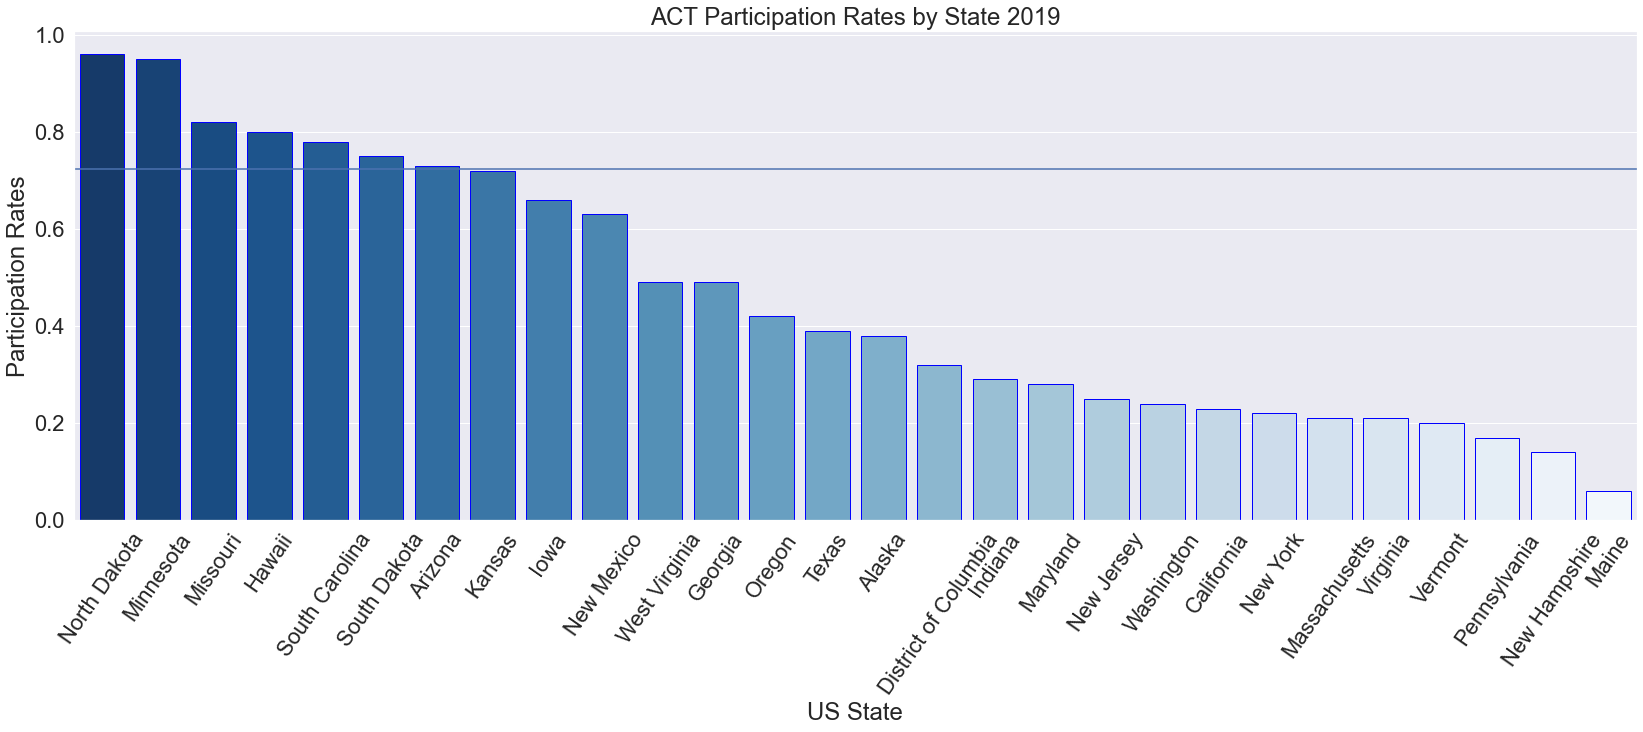

In [87]:
plt.figure(figsize=(28, 9))
plt.title('ACT Participation Rates by State 2019')
plt.xticks(rotation=55)

ax = sns.barplot(data=sat_act, x='state', y='participation_act', order=sat_act.sort_values('participation_act', ascending=False)['state'], palette='Blues_r', edgecolor='blue')
ax.set(xlabel='US State', ylabel='Participation Rates')
ax.axhline(sat_act['participation_act'].quantile(.75));

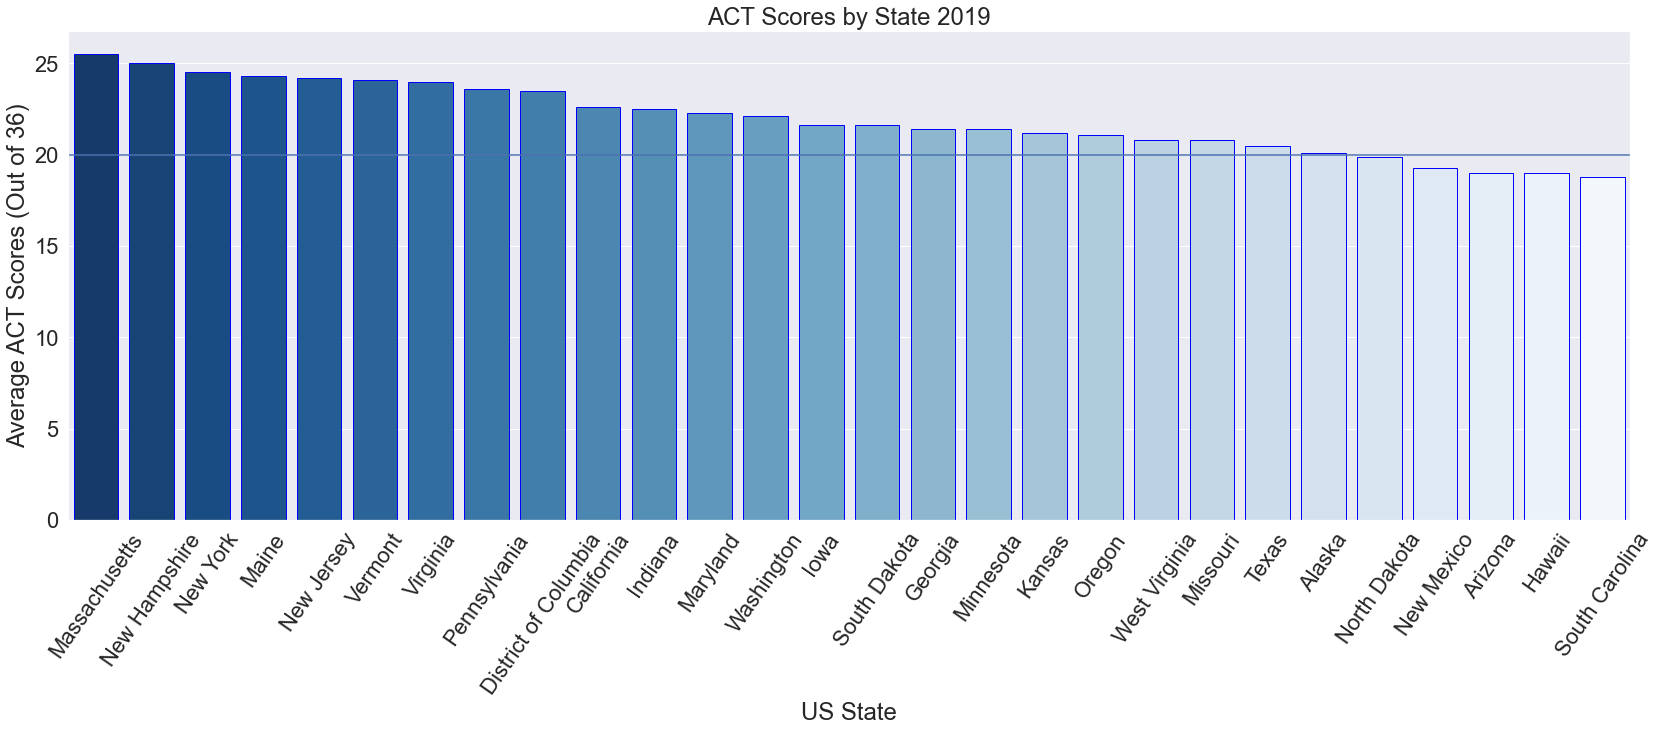

In [88]:
plt.figure(figsize=(28, 9))
plt.title('ACT Scores by State 2019')
plt.xticks(rotation=55)

ax = sns.barplot(data=sat_act, x='state', y='scores_act', order=sat_act.sort_values('scores_act', ascending=False)['state'], palette='Blues_r', edgecolor='blue')
ax.set(xlabel='US State', ylabel='Average ACT Scores (Out of 36)')
ax.axhline(20);

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

The goal of this project is to find the geographical and psychographical (intended major) areas to focus on targeting for a university's marketing strategy. This targeting focus is designed to increase revenue through the primary source of tuition and the secondary source of alumni donations. Increasing these revenue streams requires a high number of student applications (as we are measuring by SAT/ACT participation percentage) from high-quality students (as we are measuring by scores). From this data we can see that the states with the highest participation rates and scores include:

- Maine,
- New Hampshire,
- Maryland,
- New Jersey,
- Massachusetts,
- Minnesota,
- Missouri, and
- South Dakota,

indicating that these are the states where marketing investment should be prioritized.

To target high-quality students that have a higher likelihood of incomes with the most disposable income for alma mater donations post-graduation, the following programs should be advertised the most in those states:

- Biological and Biomedical Sciences,
- Business, Management, Marketing, and Related Studies, and
- Engineering

These are majors that typically lead to higher incomes relative to other majors (such as art and theatre), and these are also the intended majors that have the highest SAT participation rates, and have the higher than average SAT scores, suggesting that these are high-quality students.

To address any target demographic and state population concerns, this target demographic **should not** be the only demographic or psychographic that a school targets. However, these groups of students should be taken into consideration when developing a marketing strategy or incorporated into an existing marketing strategy.

If a private for-profit university wants to maximize revenue through tuition and post-graduate donations, while optimizing marketing spend, the above classifications should be included and prioritized in the target demographic and incorporated into the existing marketing strategy.

Don't forget to create your README!

**To-Do:** *If you combine your problem statement, data dictionary, brief summary of your analysis, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.* Don't forget to cite your data sources!